<a href="https://colab.research.google.com/github/Bharatgaur/RawProjects/blob/main/Cross_Validation_%26_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

### They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* ### Which variables are significant in predicting the price of a car
* ### How well those variables describe the price of a car
* ### Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# <b><u> Business Goal</u></b>
### We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Raw CSV file link from GitHub
url = "https://raw.githubusercontent.com/Bharatgaur/RawProjects/main/Geely%20Auto%20Car%20Price.csv"

# Read the dataset directly from the link
dataset = pd.read_csv(url)

# <b> Data Inspection

In [3]:
# First look
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# <b>DataSet Information:</b>

Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

CarName: Name of car company (Categorical)

fueltype: Car fuel type i.e gas or diesel (Categorical)

aspiration: Aspiration used in a car (Categorical)

doornumber: Number of doors in a car (Categorical)

carbody: body of car (Categorical)

drivewheel: type of drive wheel (Categorical)

enginelocation: Location of car engine (Categorical)

wheelbase: Weelbase of car (Numeric)

carlength: Length of car (Numeric)

carwidth: Width of car (Numeric)

carheight: height of car (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine. (Categorical)

cylindernumber: cylinder placed in the car (Categorical)

enginesize: Size of car (Numeric)

fuelsystem: Fuel system of car (Categorical)

boreratio: Boreratio of car (Numeric)

stroke: Stroke or volume inside the engine (Numeric)

compressionratio: compression ratio of car (Numeric)

horsepower: Horsepower (Numeric)

peakrpm: car peak rpm (Numeric)

citympg: Mileage in city (Numeric)

highwaympg: Mileage on highway (Numeric)

price(Dependent variable): Price of car (Numeric)

In [5]:
dataset.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [6]:
# Duplicate
len(dataset[dataset.duplicated()])

0

In [7]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# <b><u> Exploratory Data Analysis <b>

In [ ]:
numeric_features = dataset.describe().columns

In [ ]:
print(numeric_features)

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'log_price', 'price_boxcox'],
      dtype='object')


## <b> Transformation </b>
<b>square-root for moderate skew:</b>
sqrt(x) for positively skewed data,
sqrt(max(x+1) - x) for negatively skewed data

<b>log for greater skew:</b>
log10(x) for positively skewed data,
log10(max(x+1) - x) for negatively skewed data

<b>inverse for severe skew:</b>
1/x for positively skewed data
1/(max(x+1) - x) for negatively skewed data

<b>Linearity and heteroscedasticity:</b>
First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values
If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

<Axes: xlabel='price', ylabel='Density'>

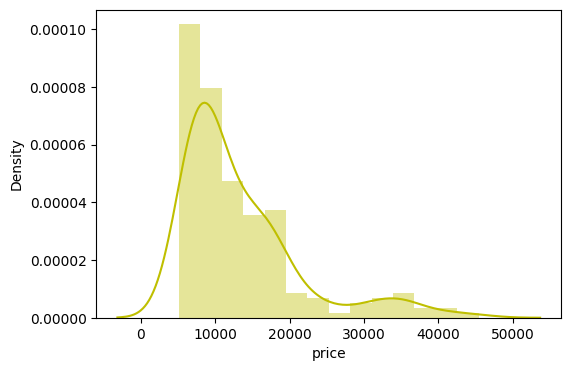

In [8]:
# Dependent variable "Price"
plt.figure(figsize= (6,4))
sns.distplot(dataset['price'], color = "y")

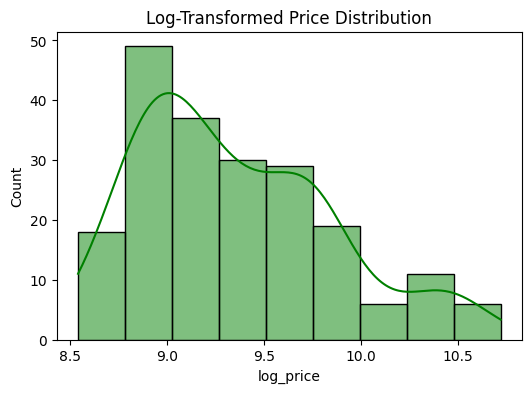

In [9]:
dataset['log_price'] = np.log(dataset['price'])

# Check distribution after log transform
plt.figure(figsize=(6,4))
sns.histplot(dataset['log_price'], color='g', kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()


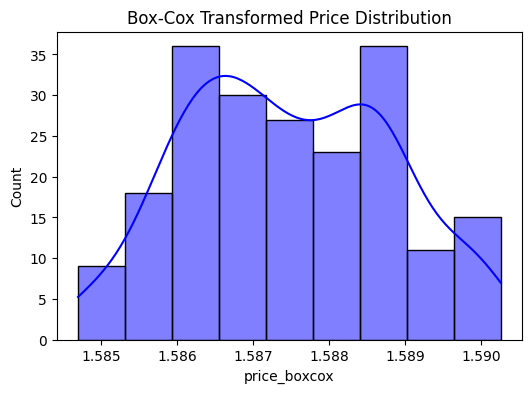

Optimal lambda: -0.6280809420471298


In [10]:
from scipy import stats

# Apply Box-Cox (returns transformed data and lambda)
dataset['price_boxcox'], fitted_lambda = stats.boxcox(dataset['price'])

# Plot transformed data
plt.figure(figsize=(6,4))
sns.histplot(dataset['price_boxcox'], color='b', kde=True)
plt.title("Box-Cox Transformed Price Distribution")
plt.show()

print("Optimal lambda:", fitted_lambda)


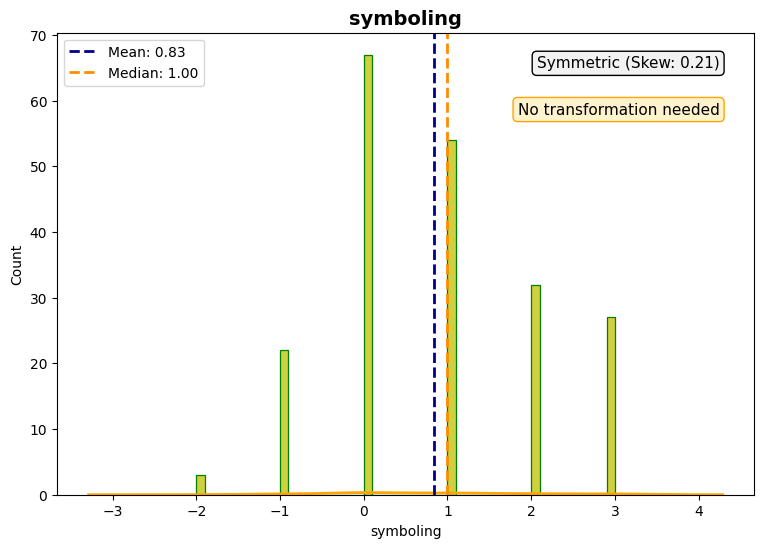

In [13]:
# metion your features
feature_name = 'symboling'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


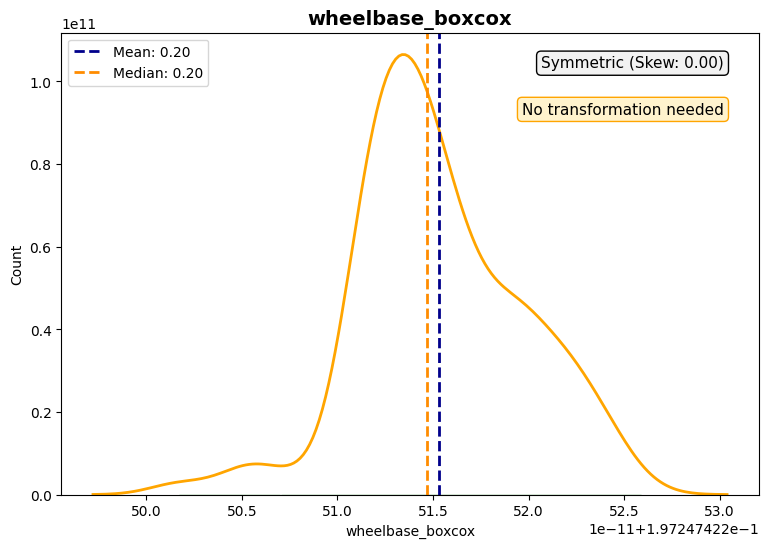

In [30]:
# metion your features
feature_name = 'wheelbase_boxcox'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


In [29]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_boxcox,wheelbase_boxcox
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1.588097,0.197247
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1.588578,0.197247
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1.588578,0.197247
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,1.588181,0.197247
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,1.588702,0.197247


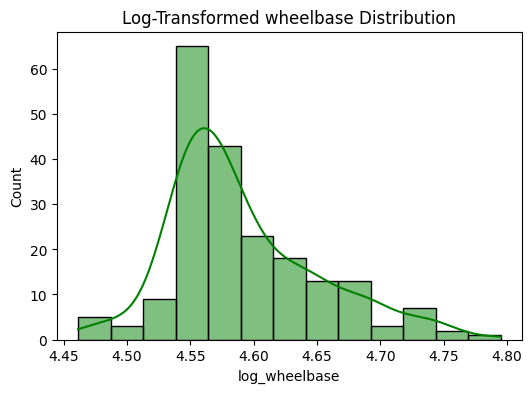

In [15]:
dataset['log_wheelbase'] = np.log(dataset['wheelbase'])

# Check distribution after log transform
plt.figure(figsize=(6,4))
sns.histplot(dataset['log_wheelbase'], color='g', kde=True)
plt.title("Log-Transformed wheelbase Distribution")
plt.show()

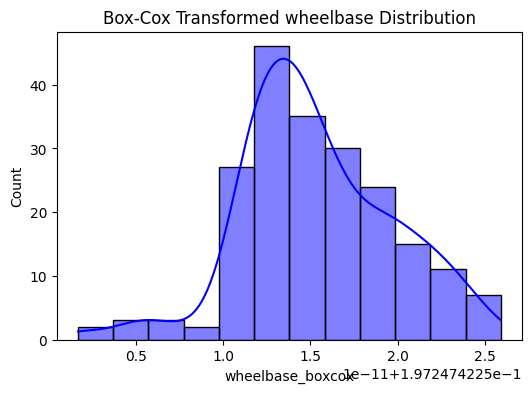

Optimal lambda: -5.069774738582423


In [17]:
from scipy import stats

# Apply Box-Cox (returns transformed data and lambda)
dataset['wheelbase_boxcox'], fitted_lambda = stats.boxcox(dataset['wheelbase'])

# Plot transformed data
plt.figure(figsize=(6,4))
sns.histplot(dataset['wheelbase_boxcox'], color='b', kde=True)
plt.title("Box-Cox Transformed wheelbase Distribution")
plt.show()

print("Optimal lambda:", fitted_lambda)


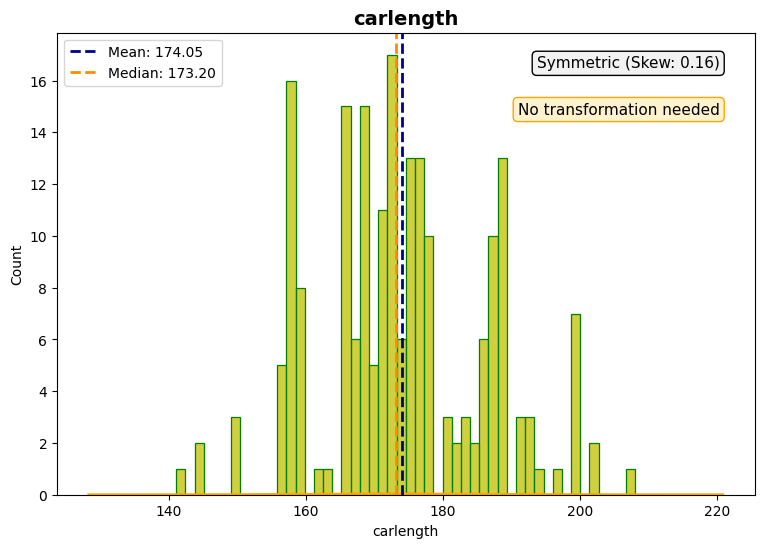

In [31]:
# metion your features
feature_name = 'carlength'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


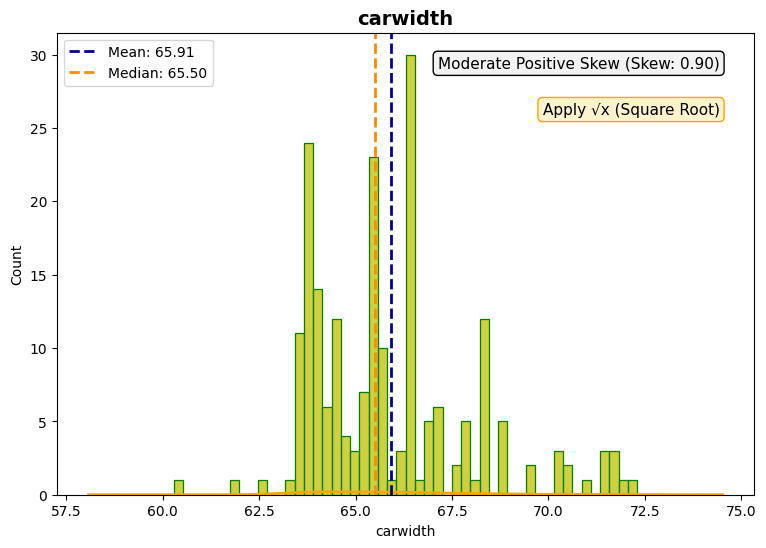

In [32]:
# metion your features
feature_name = 'carwidth'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


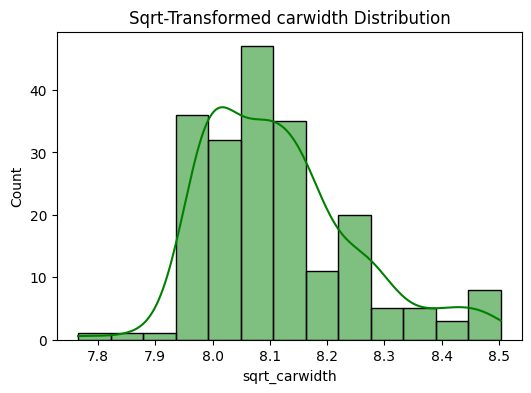

In [35]:
# Apply Square Root Transformation
dataset['sqrt_carwidth'] = np.sqrt(dataset['carwidth'])

# Check distribution after sqrt transform
plt.figure(figsize=(6, 4))
sns.histplot(dataset['sqrt_carwidth'], color='g', kde=True)
plt.title("Sqrt-Transformed carwidth Distribution")
plt.show()


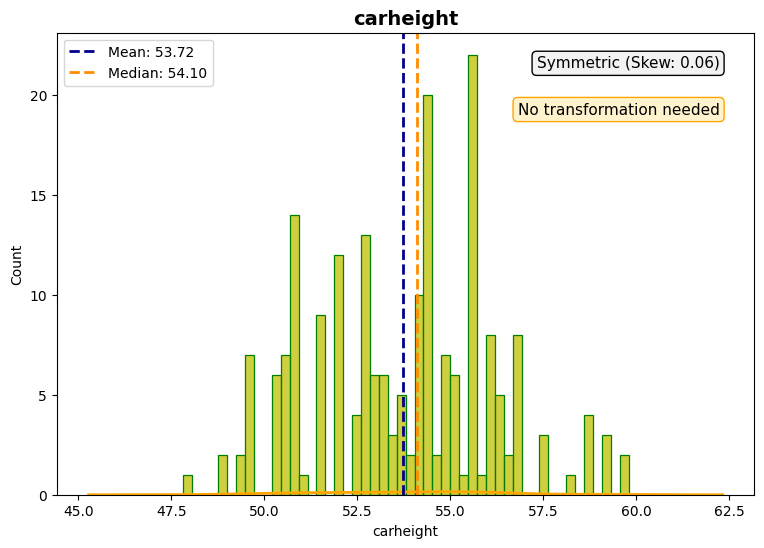

In [38]:
# metion your features
feature_name = 'carheight'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


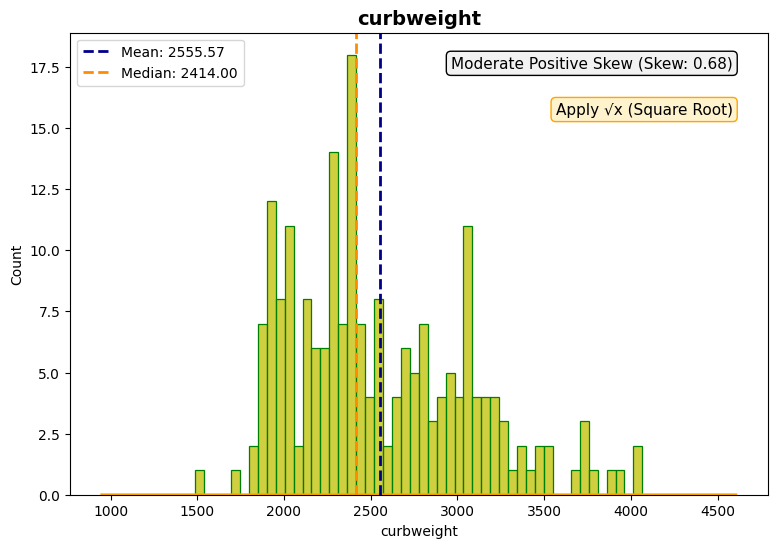

In [39]:
# metion your features
feature_name = 'curbweight'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


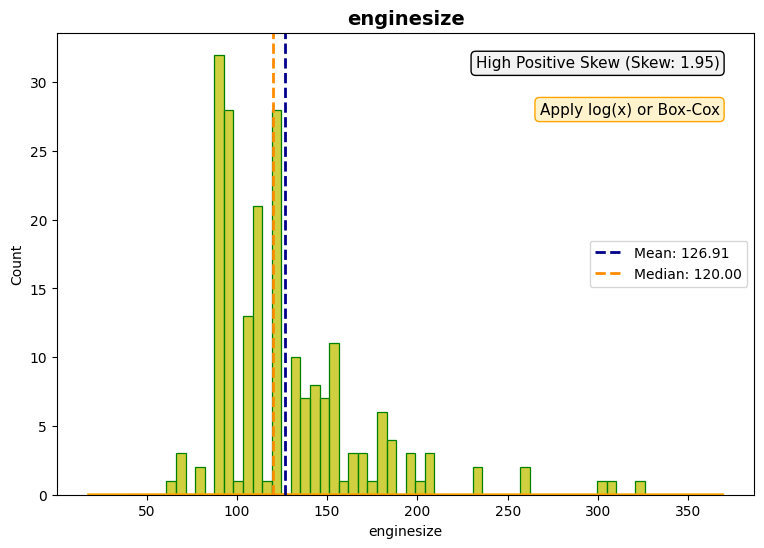

In [40]:
# metion your features
feature_name = 'enginesize'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


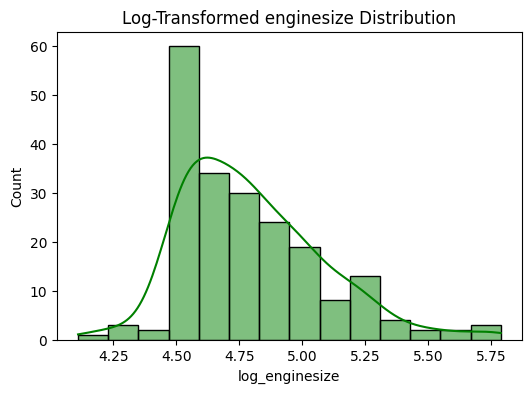

In [41]:
dataset['log_enginesize'] = np.log(dataset['enginesize'])

# Check distribution after log transform
plt.figure(figsize=(6,4))
sns.histplot(dataset['log_enginesize'], color='g', kde=True)
plt.title("Log-Transformed enginesize Distribution")
plt.show()


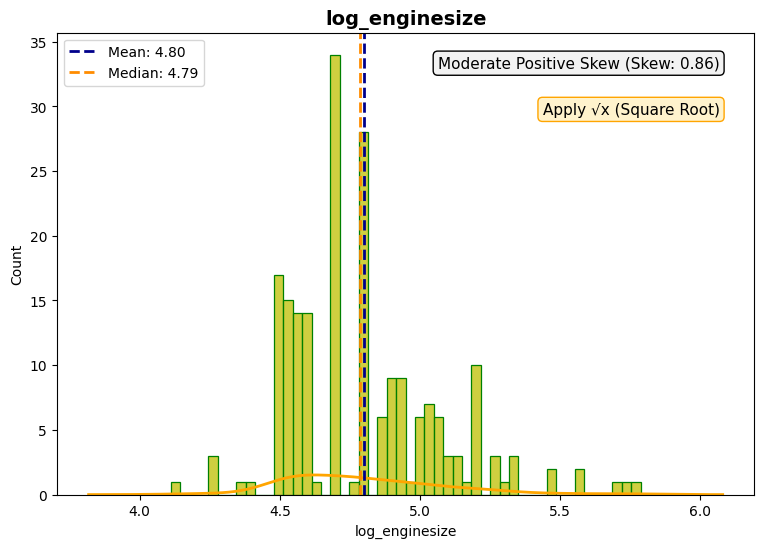

In [43]:
# metion your features
feature_name = 'log_enginesize'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


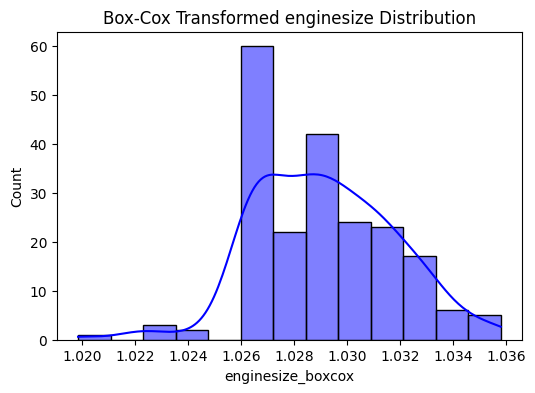

Optimal lambda: -0.9617340156571499


In [42]:
from scipy import stats

# Apply Box-Cox (returns transformed data and lambda)
dataset['enginesize_boxcox'], fitted_lambda = stats.boxcox(dataset['enginesize'])

# Plot transformed data
plt.figure(figsize=(6,4))
sns.histplot(dataset['enginesize_boxcox'], color='b', kde=True)
plt.title("Box-Cox Transformed enginesize Distribution")
plt.show()

print("Optimal lambda:", fitted_lambda)


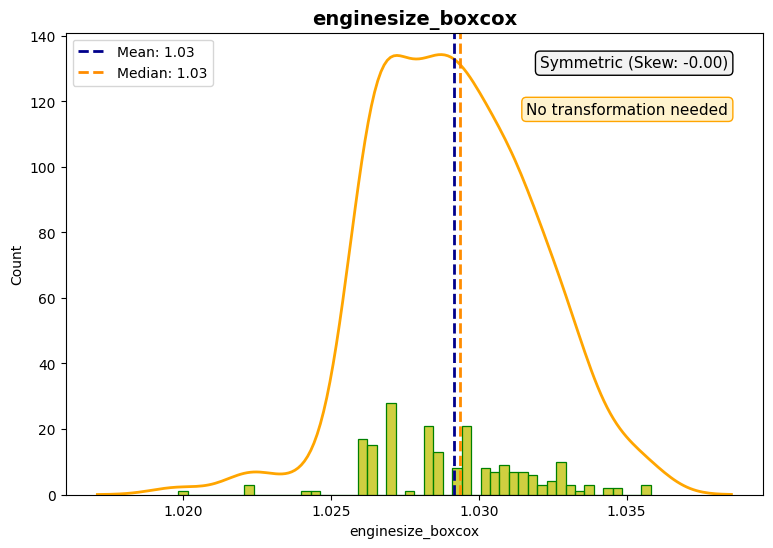

In [44]:
# metion your features
feature_name = 'enginesize_boxcox'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


In [45]:
dataset.drop(columns=['log_enginesize'], inplace=True)

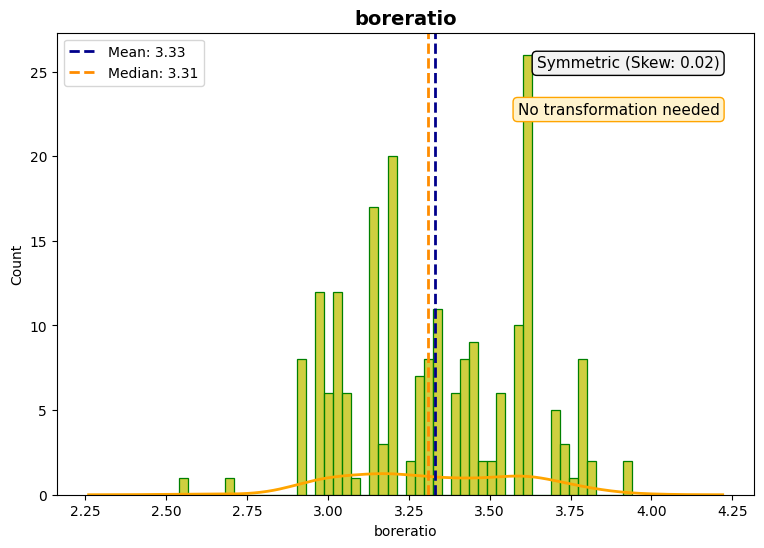

In [47]:
# metion your features
feature_name = 'boreratio'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


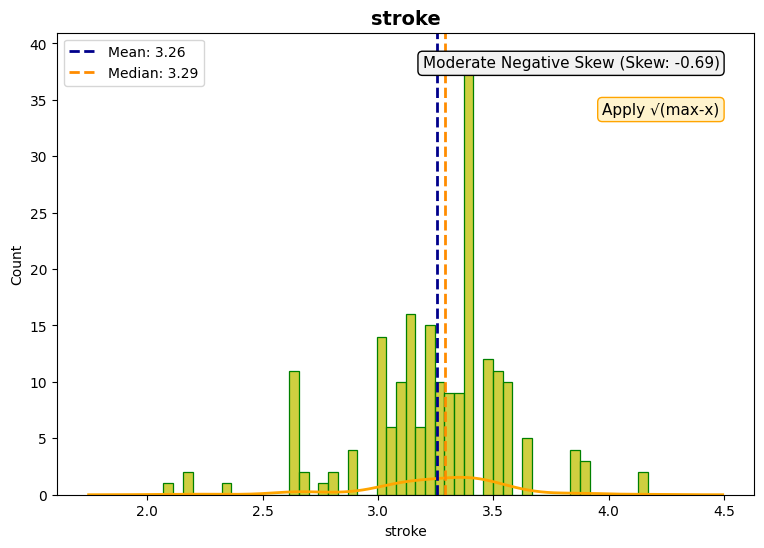

In [48]:
# metion your features
feature_name = 'stroke'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


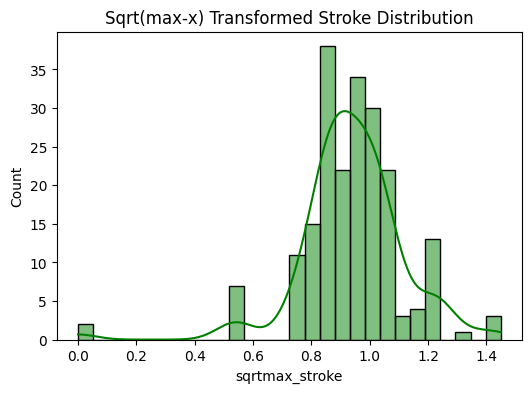

In [54]:
# Square Root (max-x) transform on 'stroke'
dataset['sqrtmax_stroke'] = np.sqrt(dataset['stroke'].max() - dataset['stroke'])

# Check distribution after sqrt(max-x) transform
plt.figure(figsize=(6,4))
sns.histplot(dataset['sqrtmax_stroke'], color='g', kde=True)
plt.title("Sqrt(max-x) Transformed Stroke Distribution")
plt.show()


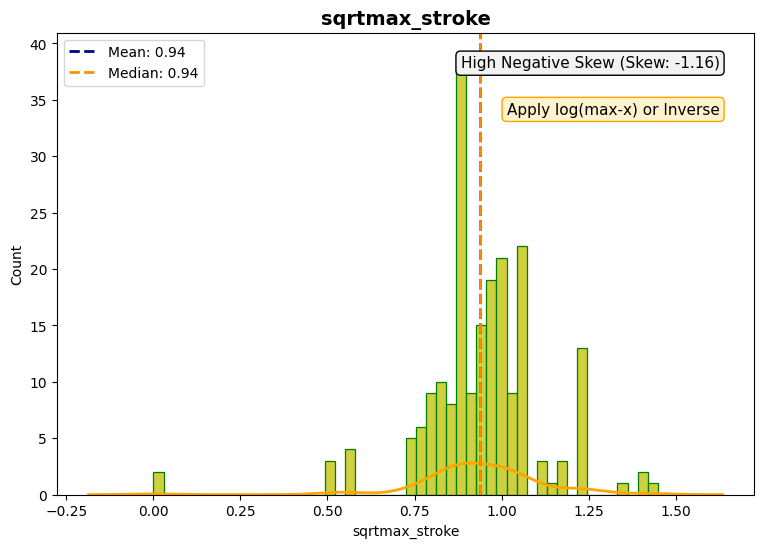

In [55]:
# metion your features
feature_name = 'sqrtmax_stroke'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


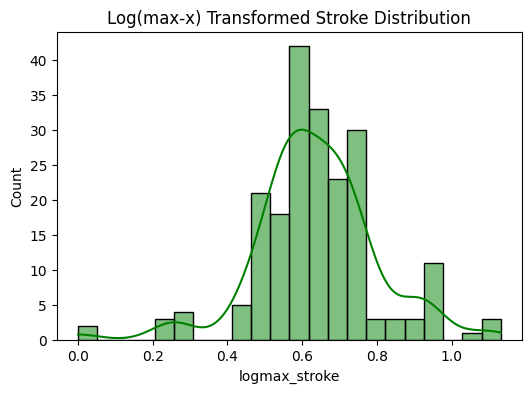

In [56]:
# Log (max-x) transform on 'stroke'
dataset['logmax_stroke'] = np.log(dataset['stroke'].max() - dataset['stroke'] + 1)

# Check distribution after log(max-x) transform
plt.figure(figsize=(6,4))
sns.histplot(dataset['logmax_stroke'], color='g', kde=True)
plt.title("Log(max-x) Transformed Stroke Distribution")
plt.show()


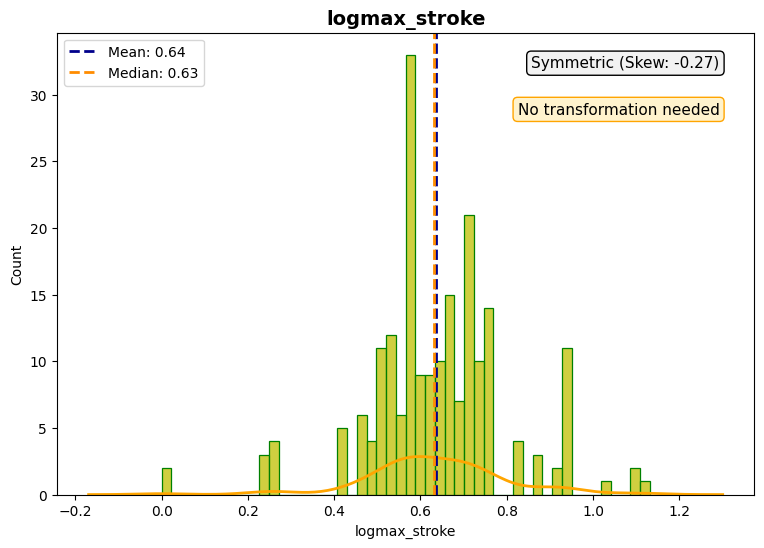

In [57]:
# metion your features
feature_name = 'logmax_stroke'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


In [58]:
dataset.drop(columns = ['sqrtmax_stroke'], inplace = True)

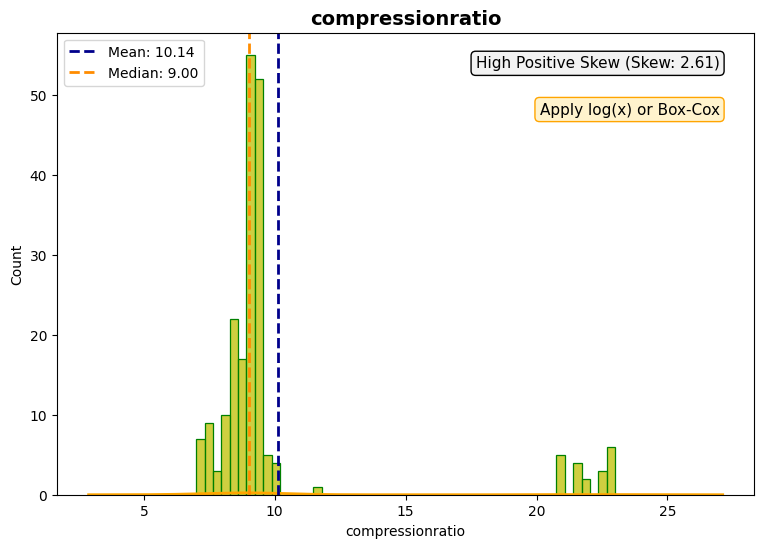

In [53]:
# metion your features
feature_name = 'compressionratio'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


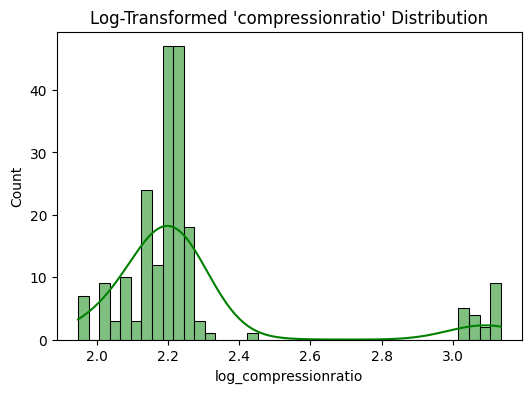

In [60]:
dataset['log_compressionratio'] = np.log(dataset['compressionratio'])

# Check distribution after log transform
plt.figure(figsize=(6,4))
sns.histplot(dataset['log_compressionratio'], color='g', kde=True)
plt.title("Log-Transformed 'compressionratio' Distribution")
plt.show()


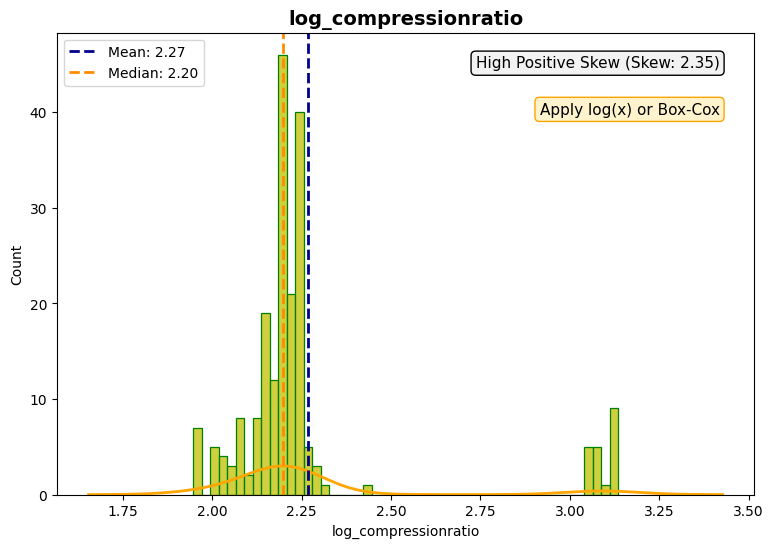

In [61]:
# metion your features
feature_name = 'log_compressionratio'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


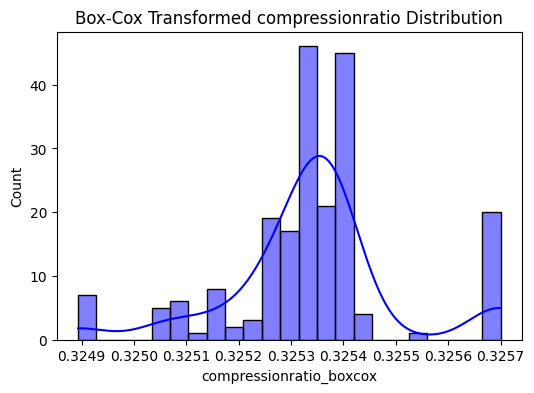

Optimal lambda: -3.070103609777699


In [62]:
from scipy import stats

# Apply Box-Cox (returns transformed data and lambda)
dataset['compressionratio_boxcox'], fitted_lambda = stats.boxcox(dataset['compressionratio'])

# Plot transformed data
plt.figure(figsize=(6,4))
sns.histplot(dataset['compressionratio_boxcox'], color='b', kde=True)
plt.title("Box-Cox Transformed compressionratio Distribution")
plt.show()

print("Optimal lambda:", fitted_lambda)


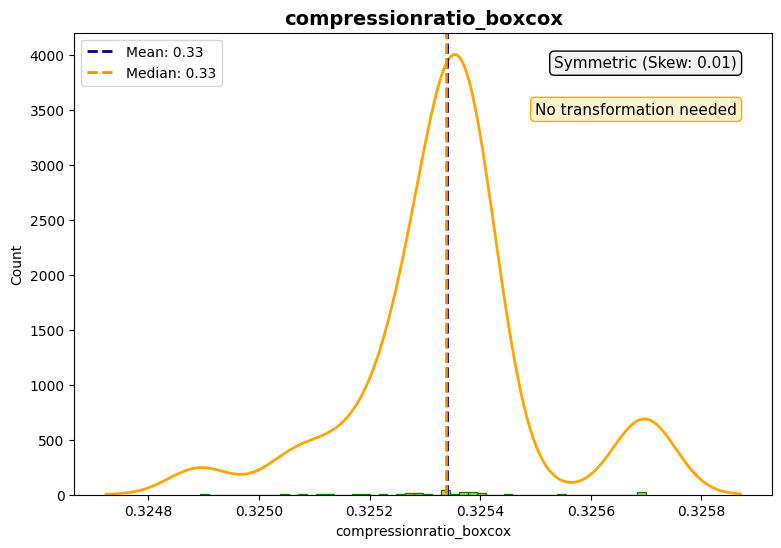

In [63]:
# metion your features
feature_name = 'compressionratio_boxcox'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


In [64]:
dataset.drop(columns = 'log_compressionratio', inplace = True)

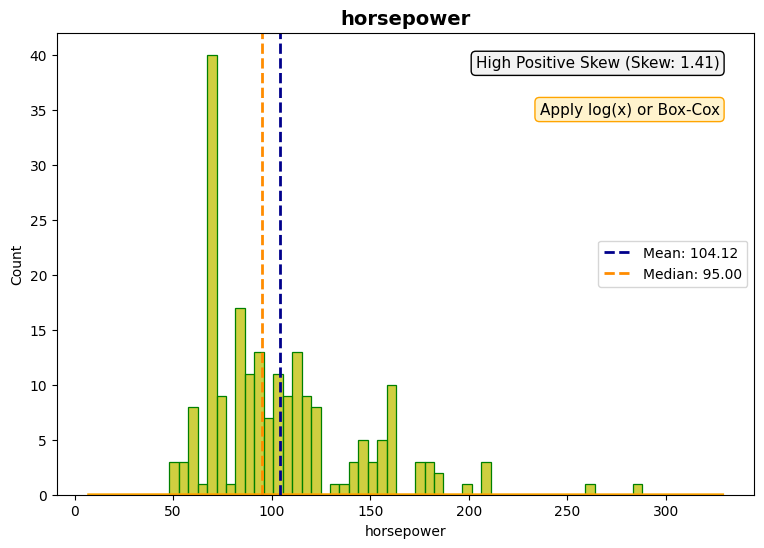

In [66]:
# metion your features
feature_name = 'horsepower'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


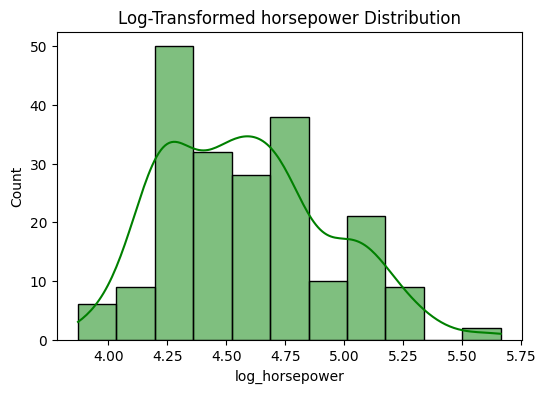

In [67]:
dataset['log_horsepower'] = np.log(dataset['horsepower'])

# Check distribution after log transform
plt.figure(figsize=(6,4))
sns.histplot(dataset['log_horsepower'], color='g', kde=True)
plt.title("Log-Transformed horsepower Distribution")
plt.show()


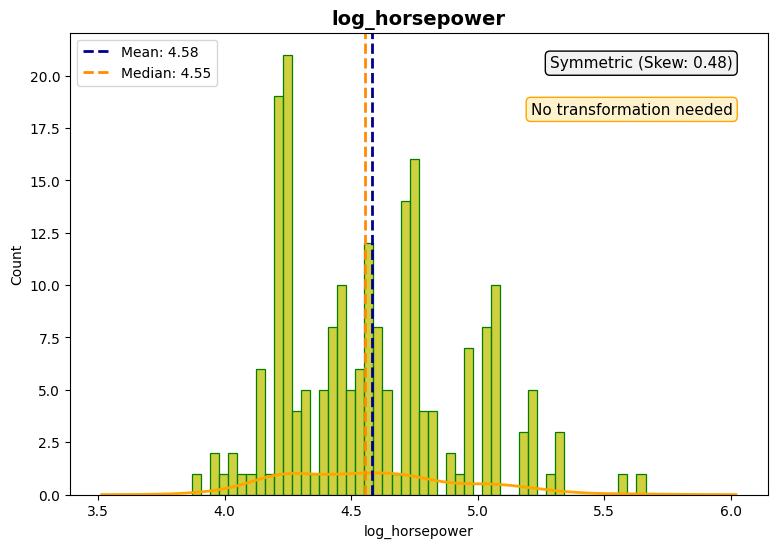

In [68]:
# metion your features
feature_name = 'log_horsepower'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


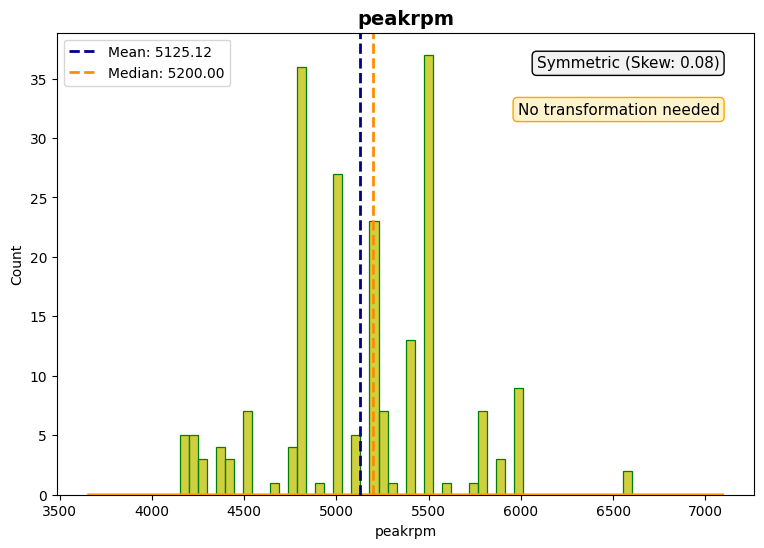

In [69]:
# metion your features
feature_name = 'peakrpm'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


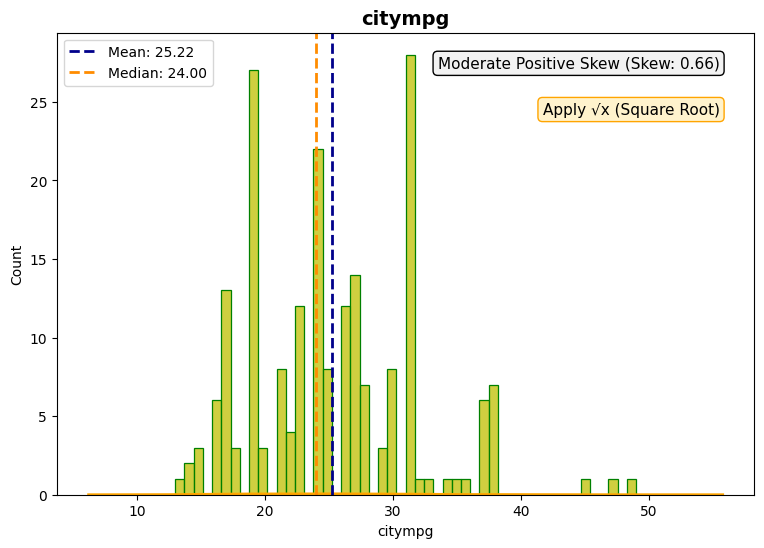

In [70]:
# metion your features
feature_name = 'citympg'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


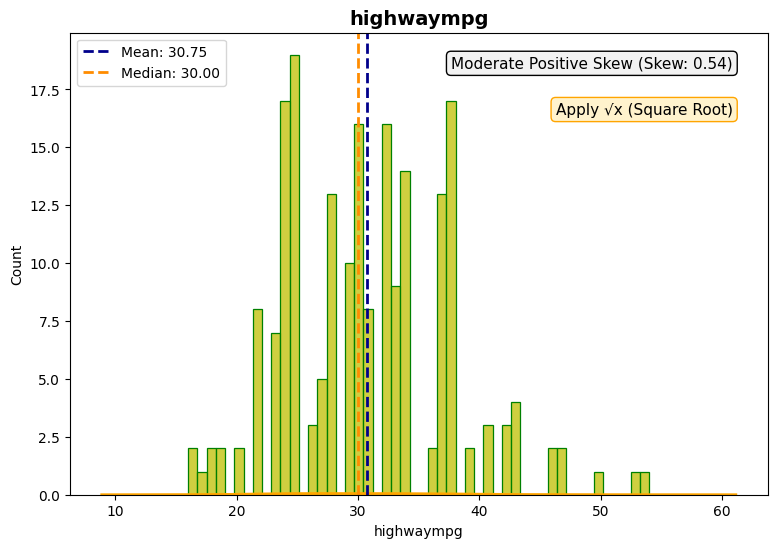

In [71]:
# metion your features
feature_name = 'highwaympg'

# Data
feature = dataset[feature_name]
mean_val = feature.mean()
median_val = feature.median()
skew_val = feature.skew()

# Chart
plt.figure(figsize=(9, 6))

# Histogram
sns.histplot(feature, bins=50, color='y', edgecolor='g')

# KDE line
sns.kdeplot(feature, color='orange', linewidth=2)

# Mean & Median lines
plt.axvline(mean_val, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='darkorange', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

# Title
plt.title(f"{feature_name}", fontsize=14, fontweight='bold')

# Legend
plt.legend()

# Skewness interpretation & suggested transformation
if abs(skew_val) < 0.5:
    distribution_type = f"Symmetric (Skew: {skew_val:.2f})"
    suggestion = "No transformation needed"
elif 0.5 <= skew_val < 1:
    distribution_type = f"Moderate Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √x (Square Root)"
elif skew_val >= 1:
    distribution_type = f"High Positive Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(x) or Box-Cox"
elif -1 < skew_val <= -0.5:
    distribution_type = f"Moderate Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply √(max-x)"
else:
    distribution_type = f"High Negative Skew (Skew: {skew_val:.2f})"
    suggestion = "Apply log(max-x) or Inverse"

# Annotate text
plt.text(0.95, 0.95, distribution_type,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#f2f2f2', edgecolor='black'))

plt.text(0.95, 0.85, suggestion,
         transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='#fff3cd', edgecolor='orange'))

plt.show()


In [78]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'price_boxcox', 'wheelbase_boxcox', 'sqrt_carwidth',
       'enginesize_boxcox', 'logmax_stroke', 'compressionratio_boxcox',
       'log_horsepower'],
      dtype='object')

In [79]:
# Final columns list jo tu chah raha hai
selected_columns = [
    'car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
    'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase_boxcox',
    'carlength', 'sqrt_carwidth', 'carheight', 'curbweight', 'enginetype',
    'cylindernumber', 'enginesize_boxcox', 'fuelsystem', 'boreratio', 'logmax_stroke',
    'compressionratio_boxcox', 'log_horsepower', 'peakrpm', 'citympg', 'highwaympg',
    'price_boxcox'
]

# Naya dataset banana
fdataset = dataset[selected_columns].copy()

# Check kar le ek baar
fdataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase_boxcox,...,enginesize_boxcox,fuelsystem,boreratio,logmax_stroke,compressionratio_boxcox,log_horsepower,peakrpm,citympg,highwaympg,price_boxcox
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,0.197247,...,1.030153,mpfi,3.47,0.912283,0.325339,4.709530,5000,21,27,1.588097
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,0.197247,...,1.030153,mpfi,3.47,0.912283,0.325339,4.709530,5000,21,27,1.588578
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,0.197247,...,1.031498,mpfi,2.68,0.530628,0.325339,5.036953,5000,19,26,1.588578
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,0.197247,...,1.028373,mpfi,3.19,0.570980,0.325445,4.624973,5500,24,30,1.588181
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,0.197247,...,1.030562,mpfi,3.19,0.570980,0.325172,4.744932,5500,18,22,1.588702


In [81]:
numeric_features = fdataset.describe().columns

In [82]:
print(numeric_features)

Index(['car_ID', 'symboling', 'wheelbase_boxcox', 'carlength', 'sqrt_carwidth',
       'carheight', 'curbweight', 'enginesize_boxcox', 'boreratio',
       'logmax_stroke', 'compressionratio_boxcox', 'log_horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price_boxcox'],
      dtype='object')


In [83]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

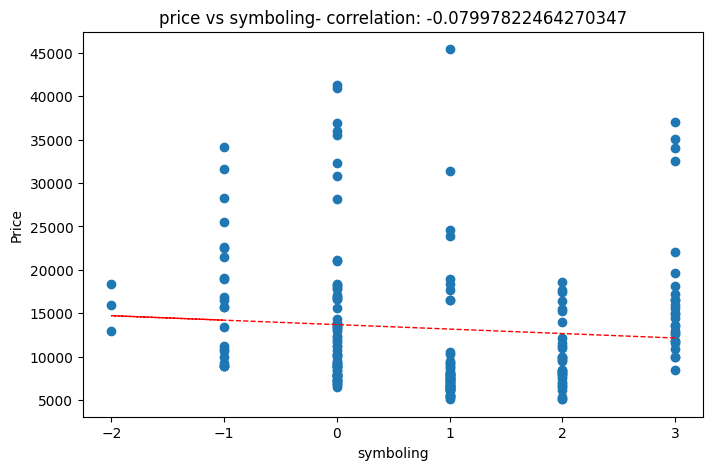

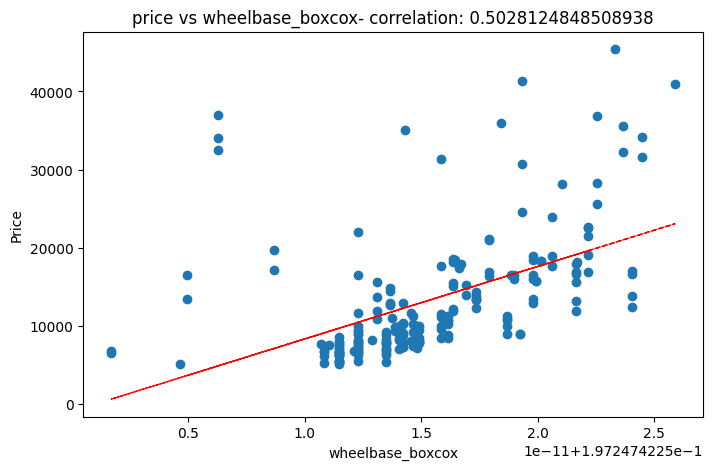

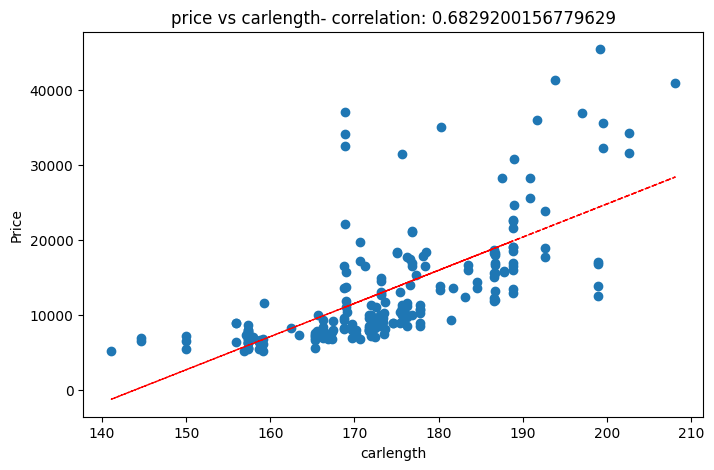

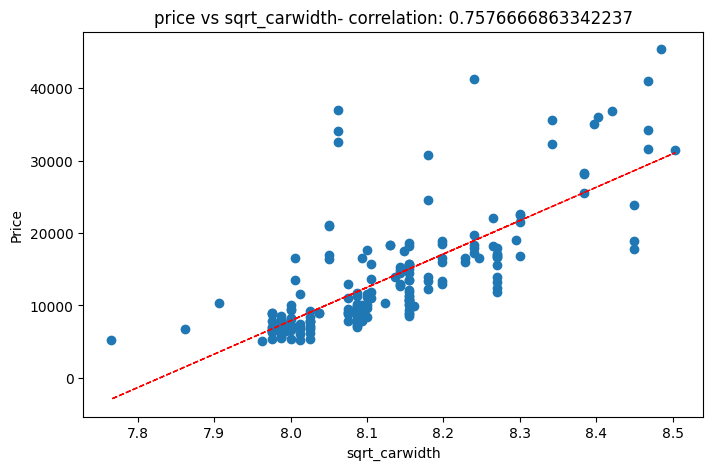

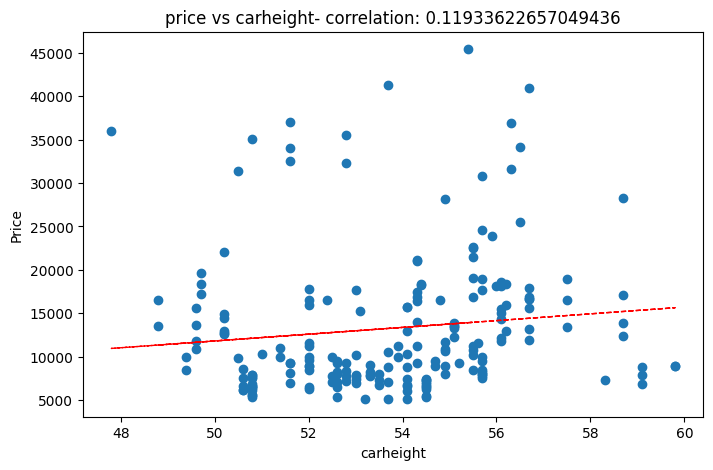

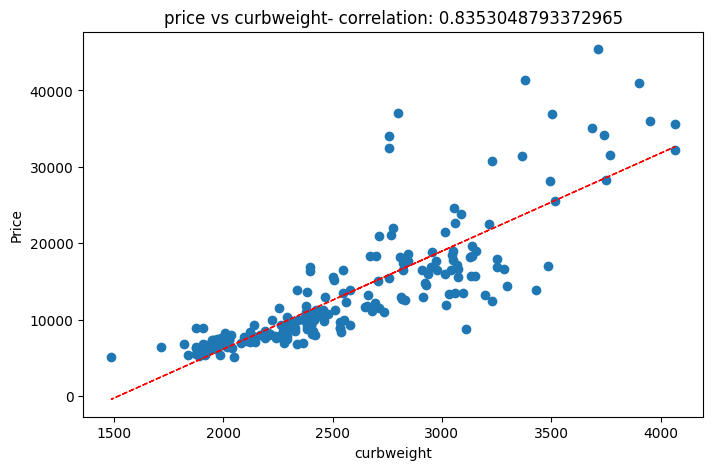

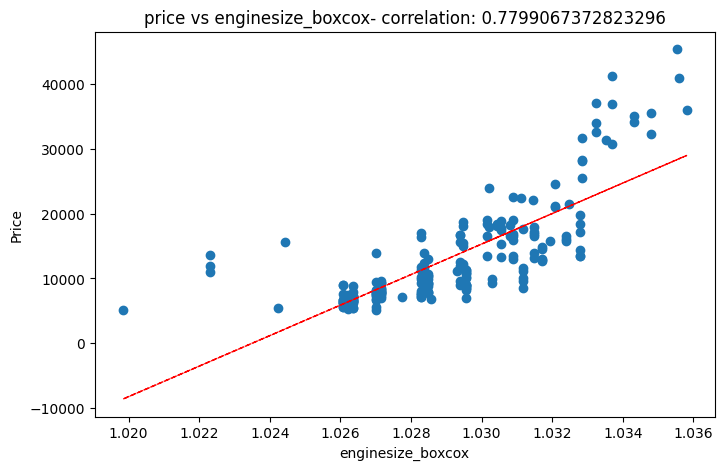

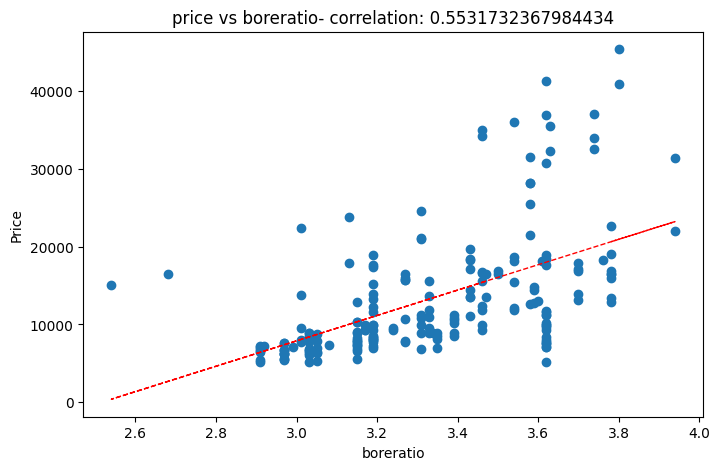

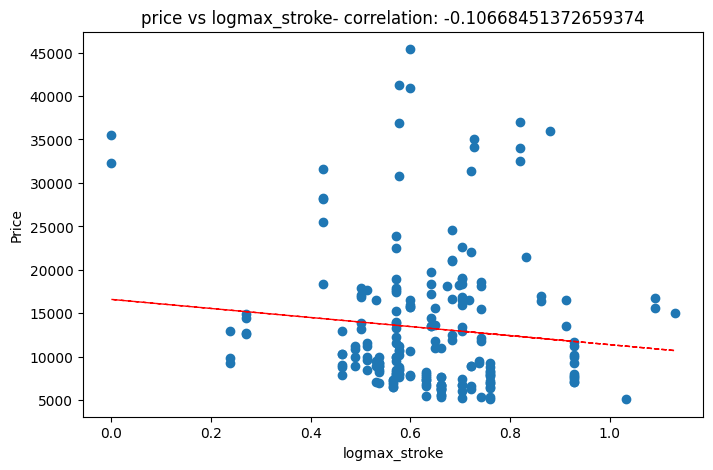

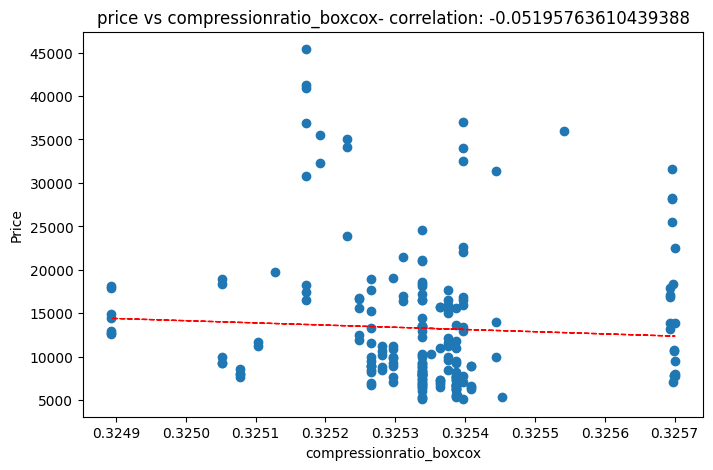

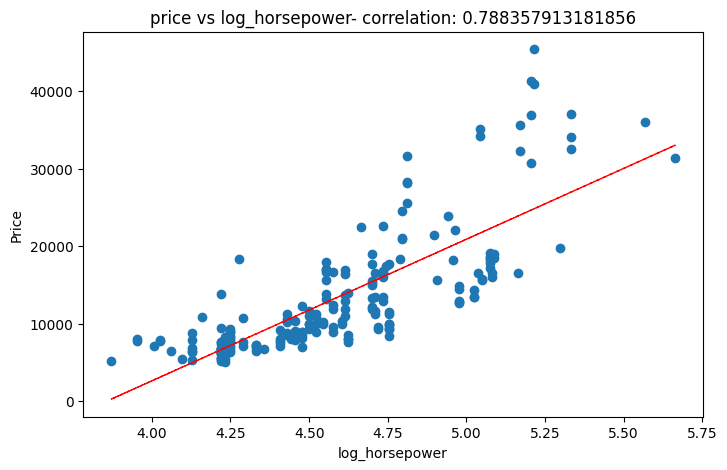

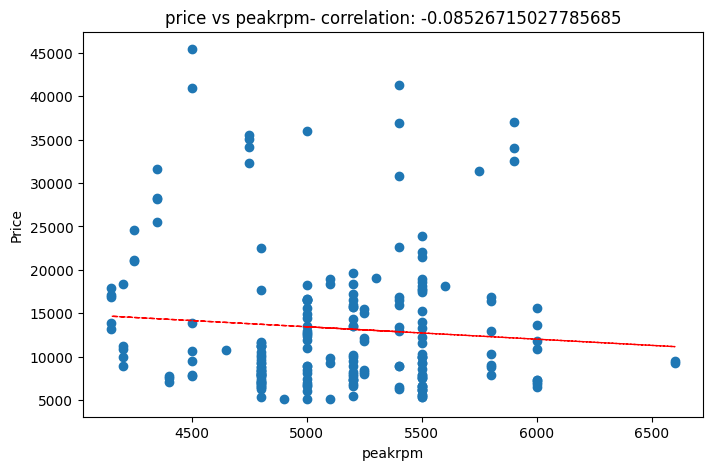

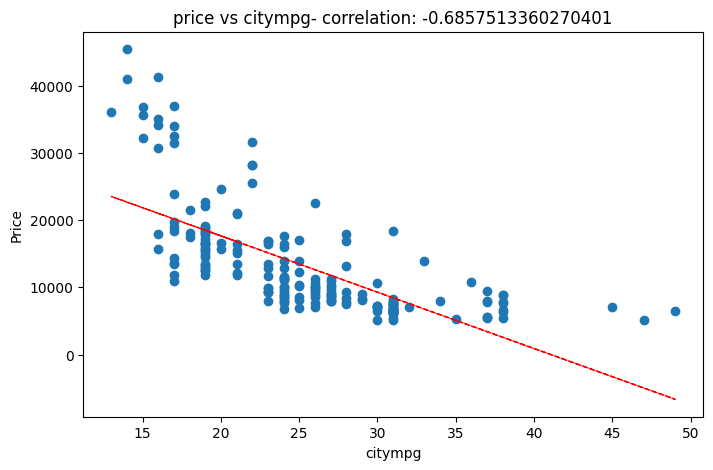

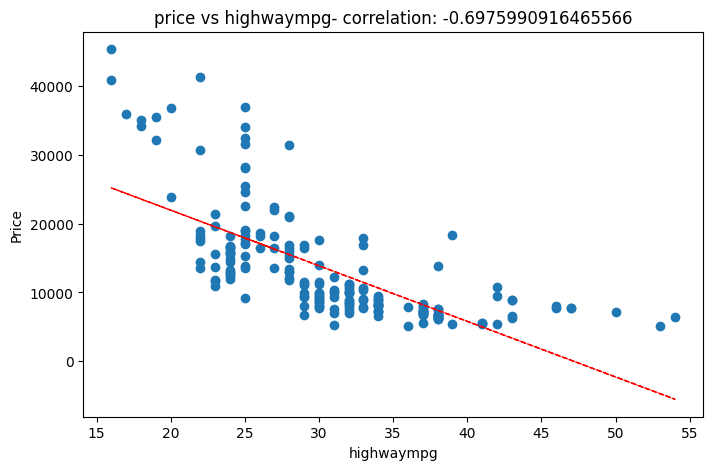

In [84]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

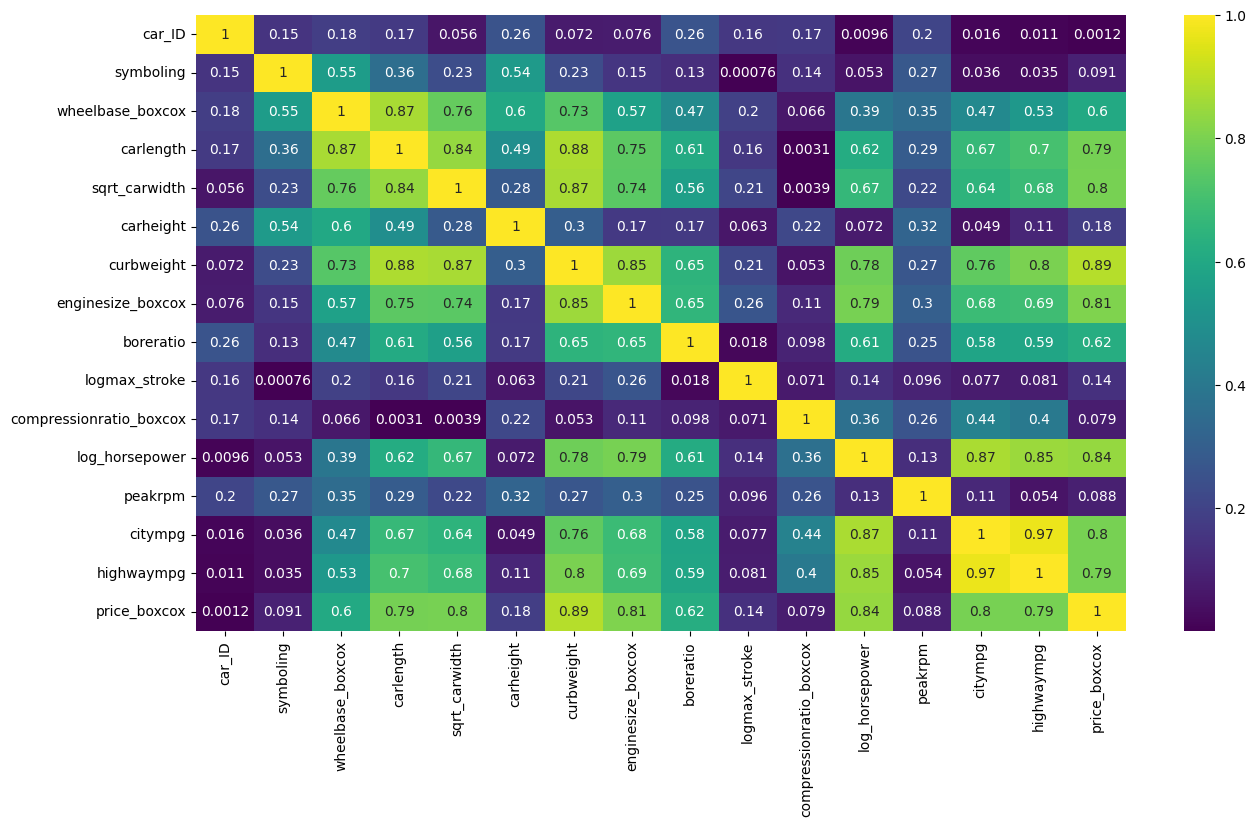

In [85]:
## Correlation with only numeric columns
plt.figure(figsize=(15,8))

numeric_data = fdataset.select_dtypes(include=[np.number])  # sirf numeric columns
correlation = numeric_data.corr()

sns.heatmap(abs(correlation), annot=True, cmap='viridis')
plt.show()

In [ ]:
### removing multicollear
dataset['mileage'] = 0.6*dataset['citympg'] + 0.4*dataset['highwaympg']
dataset['car_area'] = dataset['carlength']*dataset['carwidth']

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight']]])

,variables,VIF
0,enginesize,5.170320
1,compressionratio,9.119143
2,mileage,8.201171


In [ ]:
numerical_features = ['enginesize','compressionratio','mileage']

In [ ]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
dataset['company'] = dataset['CarName'].str.split(" ", expand=True)[0]
dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})
dataset['company'] = dataset['company'].str.title()
dataset['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Honda          13
Mitsubishi     13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Plymouth        7
Audi            7
Saab            6
Porsche         5
Isuzu           4
Alfa-Romero     3
Chevrolet       3
Jaguar          3
Renault         2
Mercury         1
Name: company, dtype: int64

In [ ]:
categorical_features = dataset.describe(include=['object','category']).columns

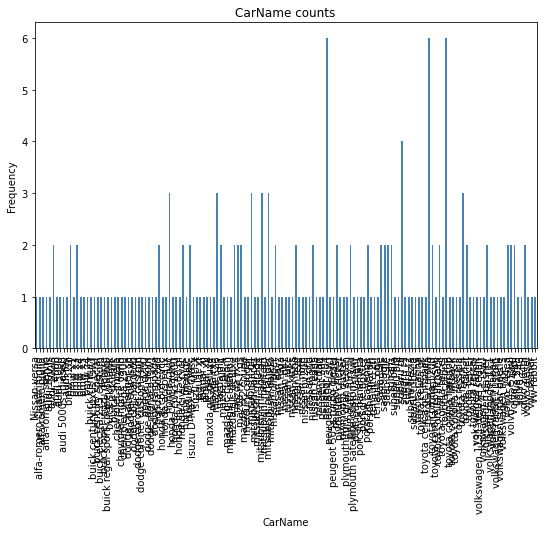

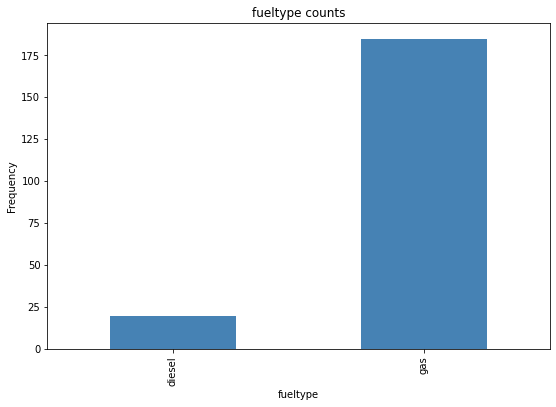

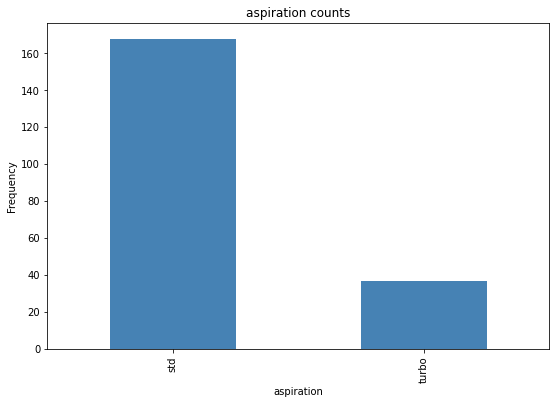

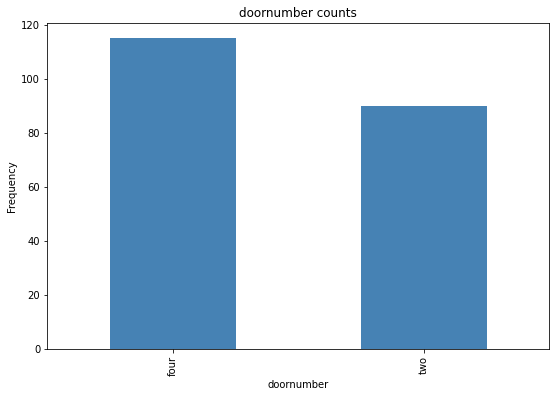

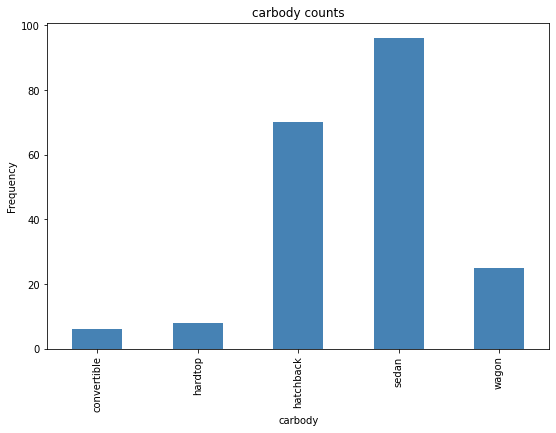

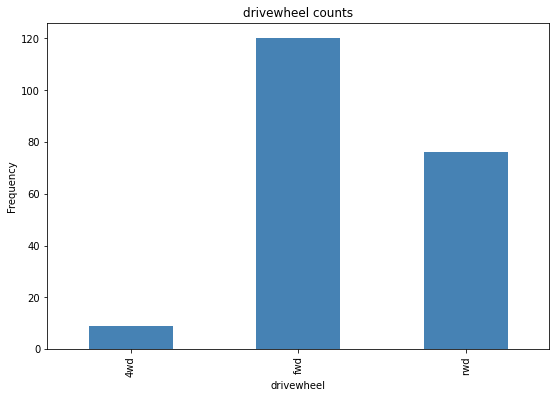

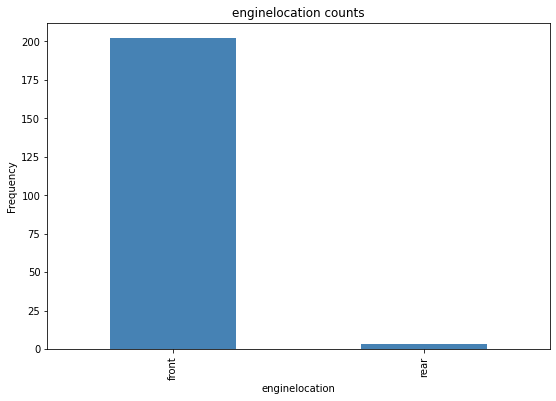

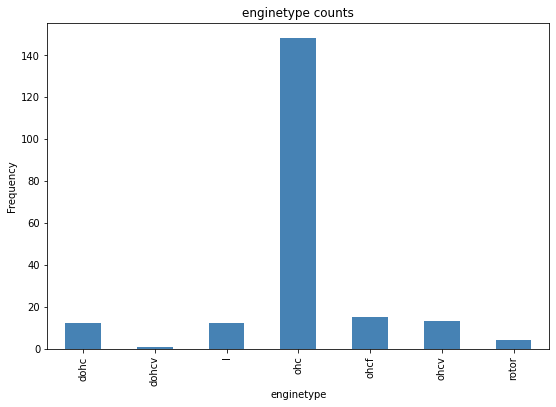

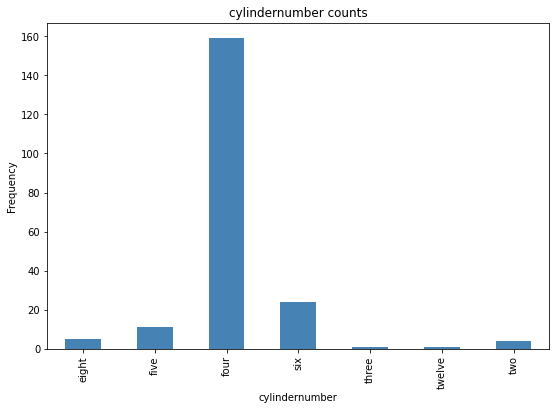

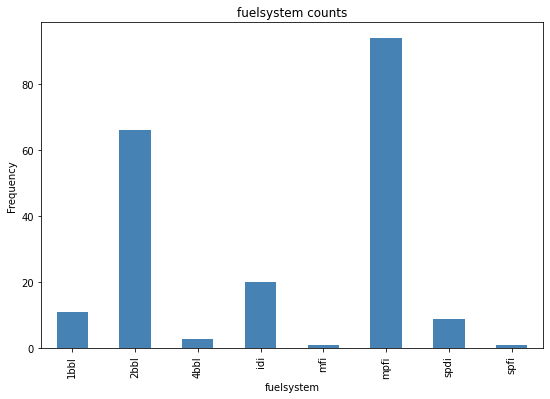

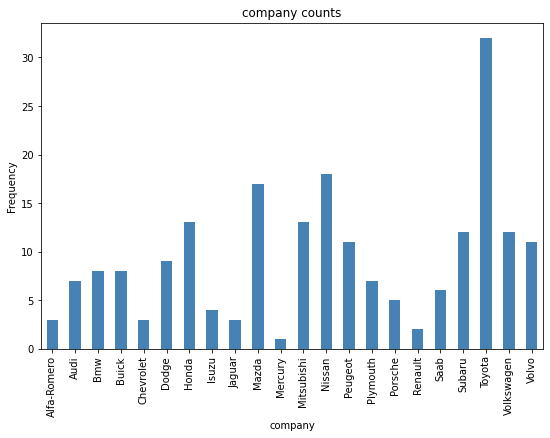

In [ ]:
# plot a bar plot for each categorical feature count

for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

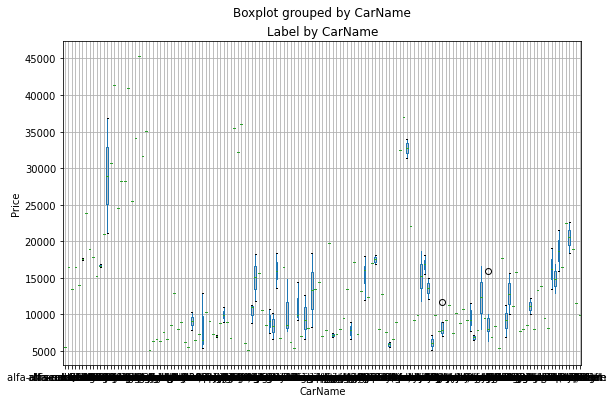

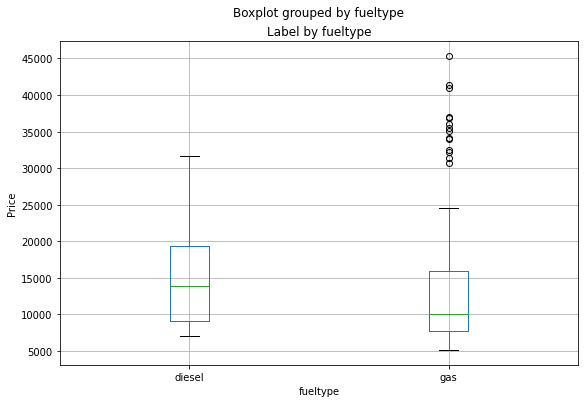

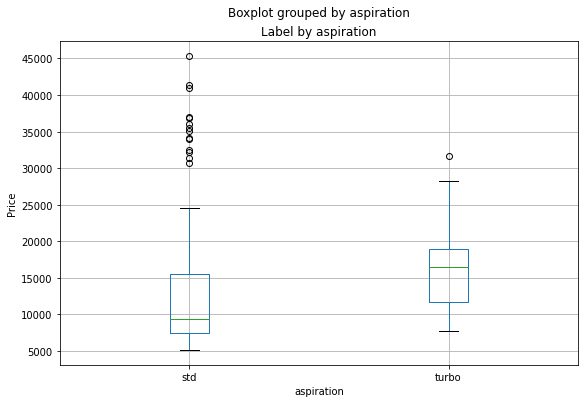

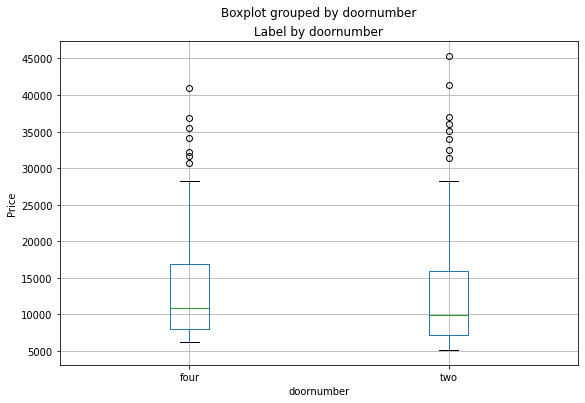

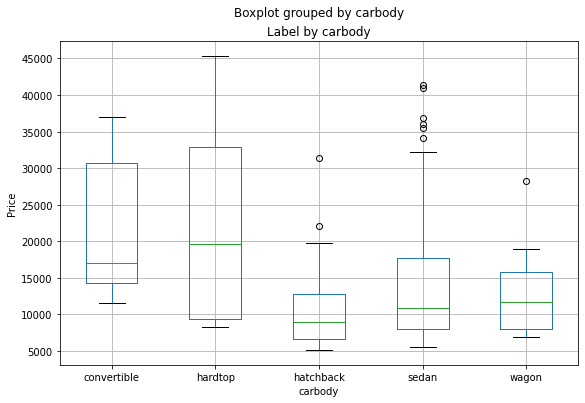

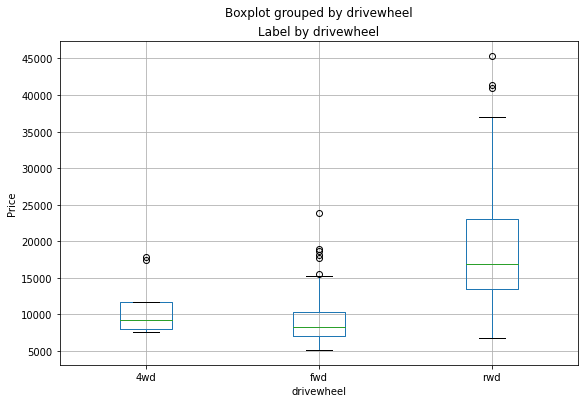

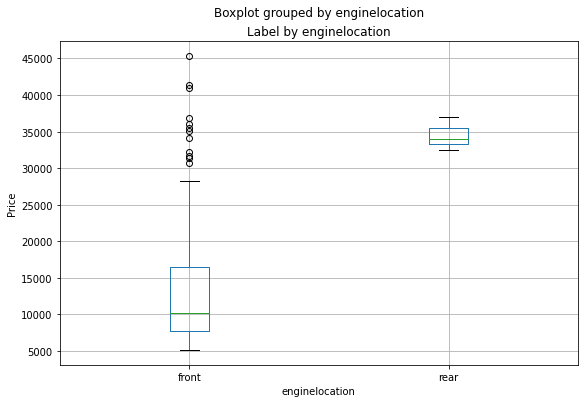

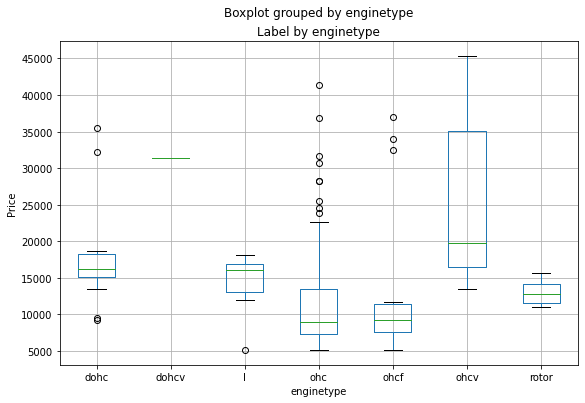

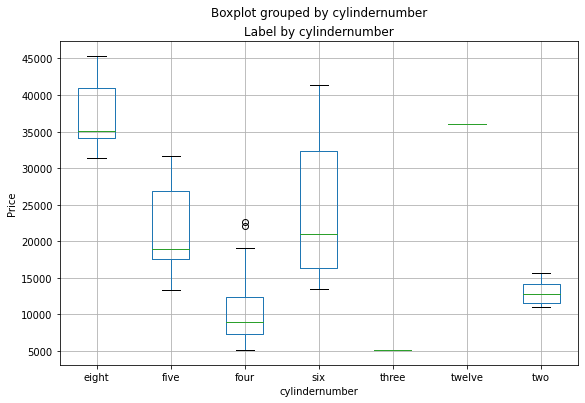

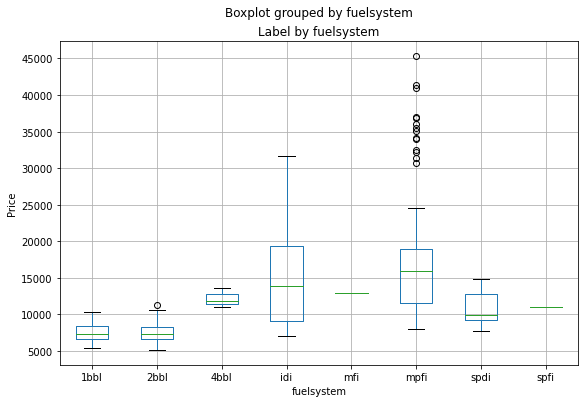

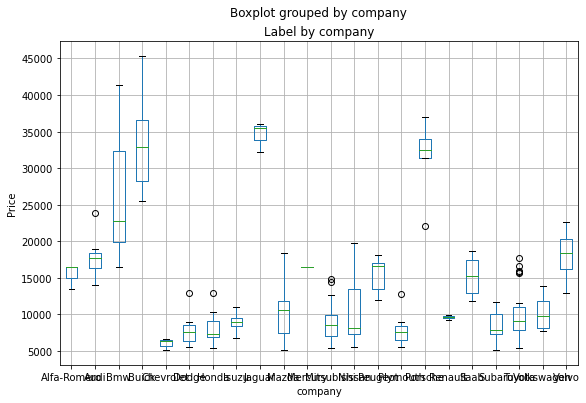

In [ ]:
# plot a boxplot for the label by each categorical feature

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

<Figure size 1440x432 with 0 Axes>

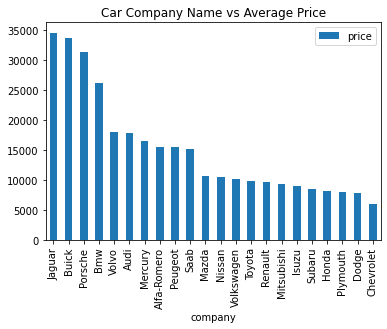

In [ ]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['company'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
df_autox.rename(columns={'price':'price_mean'},inplace=True)

In [ ]:
dataset = dataset.merge(df_autox,on = 'company',how = 'left')

In [ ]:
dataset['company_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))

In [ ]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,price_mean,company_cat
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.4,10820.08,Alfa-Romero,15498.333333,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.4,10820.08,Alfa-Romero,15498.333333,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,21.8,11213.60,Alfa-Romero,15498.333333,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.4,11690.92,Audi,17859.166714,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.6,11726.24,Audi,17859.166714,1


In [ ]:
correlation.price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

# <b> Data Preparation

In [ ]:
dataset.shape

(205, 31)

In [ ]:
dataset_pr = dataset.copy()

In [ ]:
dataset_pr.shape

(205, 31)

In [ ]:
dataset.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [ ]:
### Data encoding
#label encoding
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }

dataset_pr = dataset_pr.replace(encoders_nums)

In [ ]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["carbody", "enginetype","fuelsystem"], prefix=["body", "etype","fsystem"])

In [ ]:
dataset_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,car_area,company,price_mean,company_cat,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,etype_dohc,etype_dohcv,etype_l,etype_ohc,etype_ohcf,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,23.4,10820.08,Alfa-Romero,15498.333333,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0,0,2,1,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,23.4,10820.08,Alfa-Romero,15498.333333,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,front,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,21.8,11213.60,Alfa-Romero,15498.333333,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0,0,4,0,front,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,26.4,11690.92,Audi,17859.166714,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0,0,4,0,front,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,19.6,11726.24,Audi,17859.166714,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
dataset_pr.shape

(205, 48)

In [ ]:
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl','fsystem_idi', 'fsystem_mpfi','fsystem_spdi'])

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features].apply(zscore)

In [ ]:
y = np.log10(dataset_pr['price'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(164, 24)
(41, 24)


# <b>Implementing Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.9324420504983304

In [ ]:
reg.coef_

array([ 0.07683825,  0.01590146, -0.05608906,  0.00149697,  0.02135358,
        0.01543893,  0.01238109,  0.00031735,  0.06565892,  0.01437322,
        0.0005336 , -0.00028112,  0.00042538, -0.00796079, -0.04125975,
       -0.05110849, -0.0658886 , -0.03672994, -0.04472375, -0.00052948,
       -0.01768536,  0.00149697,  0.01790728, -0.00753211])

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 8981848.585185645
RMSE : 2996.9732373155493


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8839799650687874
Adjusted R2 :  0.7099499126719685


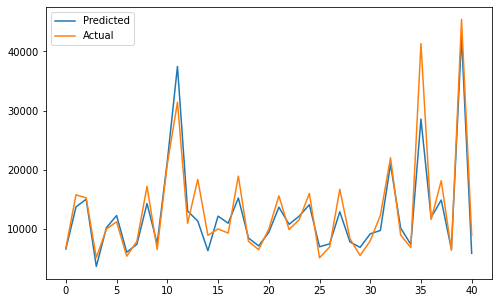

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# <b> Implementing Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.5843799787551645

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 41045022.19389814
RMSE : 6406.638915523345
R2 : 0.46981460848239964
Adjusted R2 :  -0.32546347879400095


# <b> <u> Understanding Cross Validation </u></b>

###  Machine learning is an iterative process.You will face choices about predictive variables to use, what types of models to use,what arguments to supply those models, etc. We make these choices in a data-driven way by measuring model quality of various alternatives. You've already learned to use train_test_split to split the data, so you can measure model quality on the test data. Cross-validation extends this approach to model scoring (or "model validation.") Compared to train_test_split, cross-validation gives you a more reliable measure of your model's quality, though it takes longer to run.

##<b> The Shortcoming of Train-Test Split </b>

### Imagine you have a dataset with 5000 rows. The train_test_split function has an argument for test_size that you can use to decide how many rows go to the training set and how many go to the test set. The larger the test set, the more reliable your measures of model quality will be. At an extreme, you could imagine having only 1 row of data in the test set. If you compare alternative models, which one makes the best predictions on a single data point will be mostly a matter of luck.

### You will typically keep about 20% as a test dataset. But even with 1000 rows in the test set, there's some random chance in determining model scores. A model might do well on one set of 1000 rows, even if it would be inaccurate on a different 1000 rows. The larger the test set, the less randomness (aka "noise") there is in our measure of model quality.

### But we can only get a large test set by removing data from our training data, and smaller training datasets mean worse models. In fact, the ideal modeling decisions on a small dataset typically aren't the best modeling decisions on large datasets.

# <b> The Cross-Validation Procedure </b>

### In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. For example, we could have 5 folds or experiments. We divide the data into 5 pieces, each being 20% of the full dataset.

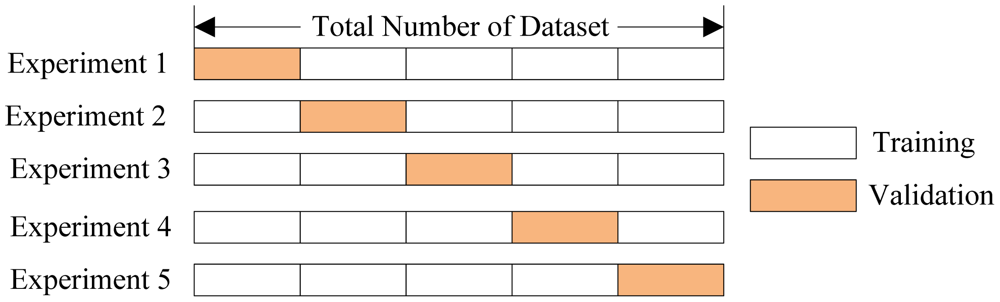

### We run an experiment called experiment 1 which uses the first fold as a holdout set, and everything else as training data. This gives us a measure of model quality based on a 20% holdout set, much as we got from using the simple train-test split.

### We then run a second experiment, where we hold out data from the second fold (using everything except the 2nd fold for training the model.) This gives us a second estimate of model quality. We repeat this process, using every fold once as the holdout. Putting this together, 100% of the data is used as a holdout at some point.

### Returning to our example above from train-test split, if we have 5000 rows of data, we end up with a measure of model quality based on 5000 rows of holdout (even if we don't use all 5000 rows simultaneously.


## <b><u> Trade-offs Between Cross-Validation and Train-Test Split </u></b>

### Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take more time to run, because it estimates models once for each fold. So it is doing more total work.

### Given these tradeoffs, when should you use each approach? On small datasets, the extra computational burden of running cross-validation isn't a big deal. These are also the problems where model quality scores would be least reliable with train-test split. So, if your dataset is smaller, you should run cross-validation.

### For the same reasons, a simple train-test split is sufficient for larger datasets. It will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

### There's no simple threshold for what constitutes a large vs small dataset. If your model takes a couple minute or less to run, it's probably worth switching to cross-validation. If your model takes much longer to run, cross-validation may slow down your workflow more than it's worth.

### Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment gives the same results, train-test split is probably sufficient.

# <b> <u> Understanding Parameters & Hyperparameters </u> </b>

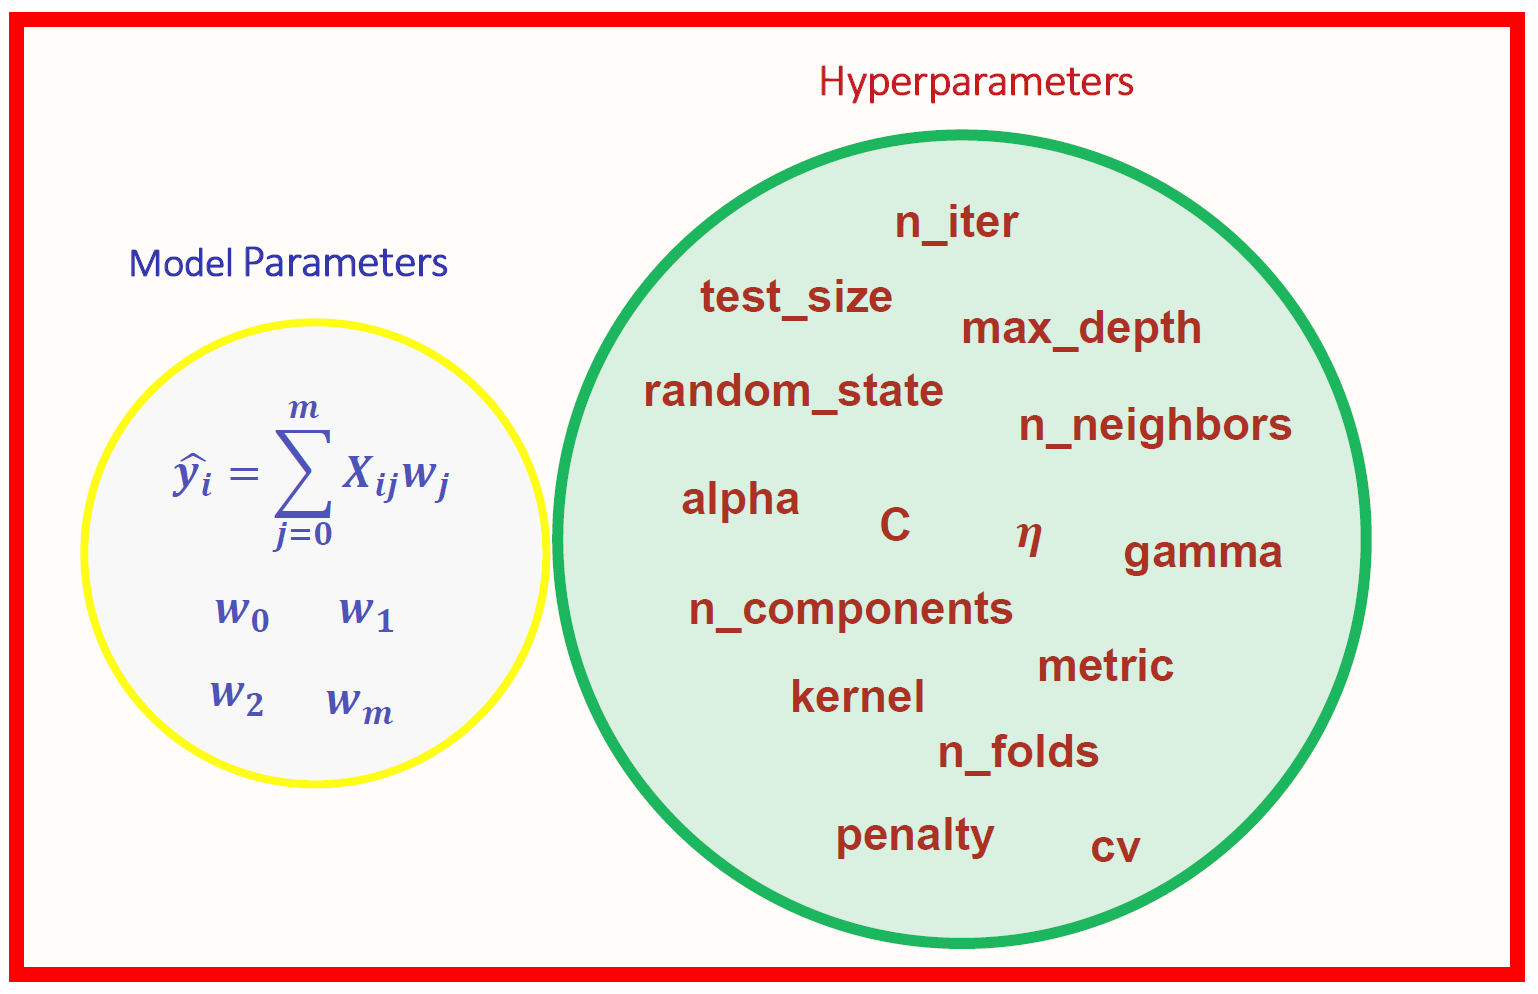

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.005057074346555317


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

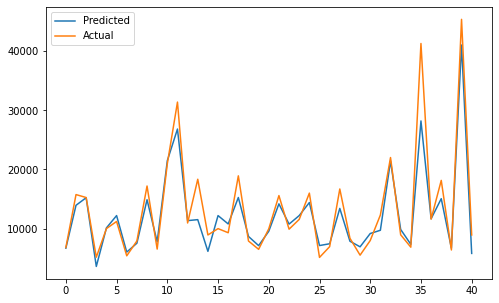

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8630691.066403879
RMSE : 2937.8037828289143
R2 : 0.8885159252566063
Adjusted R2 :  0.7212898131415157


# <b> Implementing Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(X_train, y_train)

0.9324370952031874

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8854606.545200942
RMSE : 2975.669092019632
R2 : 0.8856235717031826
Adjusted R2 :  0.7140589292579566


# <b> Running Grid Search Cross Validation for Ridge Regression </b>

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.005204770442303095


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8476786.746703872
RMSE : 2911.4921855817975
R2 : 0.8905039330011489
Adjusted R2 :  0.7262598325028724


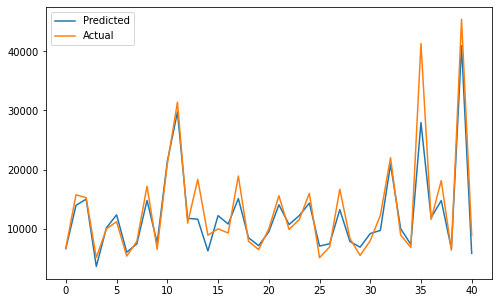

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# <b> Implementing Elastic net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elasticnet.score(X_train, y_train)

0.8099052859923915

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 19925825.06482187
RMSE : 4463.835241675242
R2 : 0.7426147971513504
Adjusted R2 :  0.3565369928783759


# <b> Running Grid Search Cross Validation for ELastic Net Regression

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.5}

Using  {'alpha': 0.01, 'l1_ratio': 0.5}  the negative mean squared error is:  -0.004799769352225591


In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8338799.785389021
RMSE : 2887.698007996858
R2 : 0.8922863335749246
Adjusted R2 :  0.7307158339373114


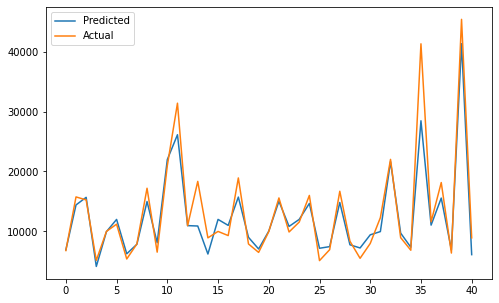

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

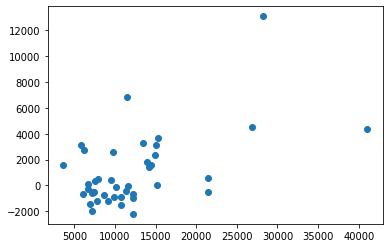

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso))

In [ ]:
10**(y_pred_lasso)

array([ 6684.39785583, 13936.91669553, 15217.23976062,  3589.09356153,
       10117.27557609, 12194.61336688,  6018.24470689,  7519.42892985,
       14879.64150701,  7753.70747444, 21490.07185467, 26839.08885746,
       11342.35725382, 11508.88965149,  6143.63835176, 12194.61336688,
       10780.50319939, 15255.28907715,  8667.92516307,  7110.96624761,
        9540.35473449, 14181.00503042, 10753.61476899, 12194.61336688,
       14400.68144589,  7124.28713146,  7430.2567917 , 13409.69424835,
        7857.34842549,  6910.79079643,  9159.80797433,  9710.53406352,
       21433.40971243,  9850.23218106,  7326.56555518, 28210.96930463,
       11656.59176775, 15056.78993984,  6683.85400197, 41057.76724391,
        5794.99344654])

In [ ]:
10**(y_test)

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
170    11199.0
76      5389.0
154     7898.0
104    17199.0
33      6529.0
12     20970.0
129    31400.5
55     10945.0
66     18344.0
45      8916.5
169     9989.0
130     9295.0
7      18920.0
37      7895.0
152     6488.0
80      9959.0
111    15580.0
131     9895.0
171    11549.0
179    15998.0
138     5118.0
156     6938.0
113    16695.0
161     8358.0
89      5499.0
183     7975.0
193    12290.0
125    22018.0
173     8948.0
92      6849.0
16     41315.0
189    11595.0
136    18150.0
22      6377.0
74     45400.0
44      8916.5
Name: price, dtype: float64